In [5]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train= 'C:/Users/rakes/Desktop/Malaria_prediction/Train/'
test = 'C:/Users/rakes/Desktop/Malaria_prediction/Test/'

In [7]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
for layer in mobilnet.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders = glob('C:/Users/rakes/Desktop/Malaria_prediction/Train/*')
folders

['C:/Users/rakes/Desktop/Malaria_prediction/Train\\Parasite',
 'C:/Users/rakes/Desktop/Malaria_prediction/Train\\Uninfected']

In [12]:
x = Flatten()(mobilnet.output)

prediction = Dense(len(folders), activation= 'softmax')(x)

model = Model(inputs = mobilnet.input, outputs = prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/rakes/Desktop/Malaria_prediction/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('C:/Users/rakes/Desktop/Malaria_prediction/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 62s 5s/step - loss: 1.3990 - acc: 0.5481 - val_loss: 0.5856 - val_acc: 0.7164
Epoch 2/50
13/13 [==============================] - 64s 5s/step - loss: 0.6355 - acc: 0.6562 - val_loss: 1.0907 - val_acc: 0.4552
Epoch 3/50
13/13 [==============================] - 65s 5s/step - loss: 0.5399 - acc: 0.7139 - val_loss: 0.4581 - val_acc: 0.7537
Epoch 4/50
13/13 [==============================] - 65s 5s/step - loss: 0.4140 - acc: 0.7909 - val_loss: 0.7179 - val_acc: 0.6567
Epoch 5/50
13/13 [==============================] - 66s 5s/step - loss: 0.3123 - acc: 0.8798 - val_loss: 0.4068 - val_acc: 0.8060
Epoch 6/50
13/13 [==============================] - 66s 5s/step - loss: 0.3059 - acc: 0.8726 - val_loss: 0.3633 - val_acc: 0.8433
Epoch 7/50
13/13 [==============================] - 65s 5s/step - loss: 0.2847 - acc: 0.8870 - val_loss: 0.5444 - val_acc: 0.6791
Epoch 8/50
13/13 [==============================] - 65s 5s/step - loss: 0.2848 - acc: 0.89

13/13 [==============================] - 78s 6s/step - loss: 0.1018 - acc: 0.9688 - val_loss: 0.2718 - val_acc: 0.9328
Epoch 39/50
13/13 [==============================] - 61s 5s/step - loss: 0.0854 - acc: 0.9712 - val_loss: 0.2326 - val_acc: 0.8955
Epoch 40/50
13/13 [==============================] - 62s 5s/step - loss: 0.0852 - acc: 0.9760 - val_loss: 0.2701 - val_acc: 0.8507
Epoch 41/50
13/13 [==============================] - 66s 5s/step - loss: 0.0925 - acc: 0.9736 - val_loss: 0.4807 - val_acc: 0.7687
Epoch 42/50
13/13 [==============================] - 64s 5s/step - loss: 0.0890 - acc: 0.9760 - val_loss: 0.3658 - val_acc: 0.8507
Epoch 43/50
13/13 [==============================] - 64s 5s/step - loss: 0.0944 - acc: 0.9736 - val_loss: 0.1607 - val_acc: 0.9478
Epoch 44/50
13/13 [==============================] - 65s 5s/step - loss: 0.0933 - acc: 0.9639 - val_loss: 0.3698 - val_acc: 0.8507
Epoch 45/50
13/13 [==============================] - 65s 5s/step - loss: 0.1009 - acc: 0.9712 -

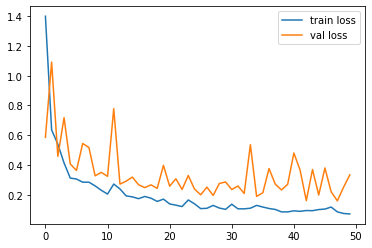

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [1]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

NameError: name 'model' is not defined